In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv("engine_data.csv")

In [7]:
df.head(10)

,heat,vib,failure
0,314.901425,569.967772,0
1,295.852071,546.231684,0
2,319.430656,502.981518,0
3,345.690896,467.653161,0
4,292.975399,534.911166,0
5,292.975891,519.674269,0
6,347.376384,544.759661,0
7,323.023042,531.758590,0
8,285.915768,552.477636,0
9,316.276801,473.238239,0


## Parameters

In [10]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [17]:
# mu = X.describe().loc["mean"]
mu = X.mean()
mu

heat    300.579962
vib     503.541812
dtype: float64

In [19]:
sigma = X.std() 
sigma

heat    29.376478
vib     49.872719
dtype: float64

### Density

In [21]:
import scipy.stats as scs

In [34]:
x = scs.norm(0, 1).pdf(np.linspace(-10,10,200));

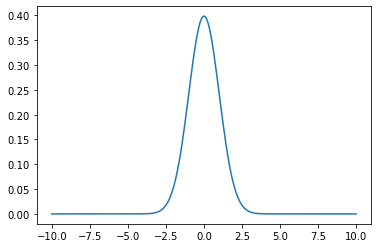

In [32]:
plt.plot(np.linspace(-10,10,200), x)

-----------

In [35]:
scs.norm(mu, sigma)

In [39]:
p12 = scs.norm(mu, sigma).pdf(X)
p12

array([[0.01205871, 0.00329482],
       [0.01340558, 0.00554554],
       [0.01105339, 0.0079987 ],
       ...,
       [0.01110282, 0.00506926],
       [0.01132249, 0.00778227],
       [0.01157692, 0.00572548]])

In [44]:
p_X = p12.prod(axis=1)

In [46]:
p_X.shape

(1000,)

(192.1111249210178, 426.2327995965516, 337.6316511600716, 675.0042954989573)

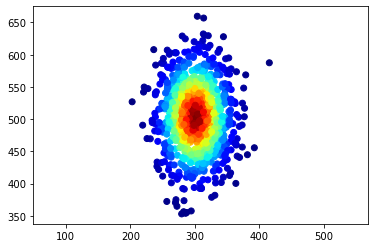

In [68]:
plt.scatter(X["heat"], X["vib"], c=p_X, cmap="jet")
plt.axis("equal")

(192.1111249210178, 426.2327995965516, 337.6316511600716, 675.0042954989573)

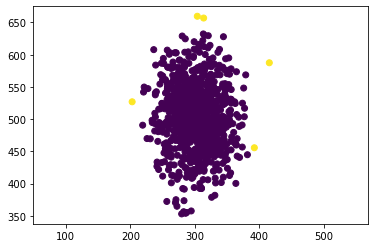

In [55]:
plt.scatter(X["heat"], X["vib"], c=y)
plt.axis("equal")

(192.1111249210178, 426.2327995965516, 337.6316511600716, 675.0042954989573)

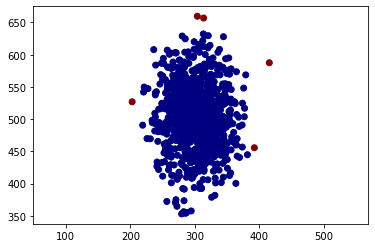

In [86]:
plt.scatter(X["heat"], X["vib"], c=p_X <= 1.238820612206876e-08, cmap="jet")
plt.axis("equal")

In [71]:
df2 = pd.DataFrame({"p" : p_X, "Y": y})

In [72]:
df2.head()

,p,Y
0,0.000040,0
1,0.000074,0
2,0.000088,0
3,0.000026,0
4,0.000086,0


In [89]:
epsilon = df2[y == 1].max()[0]
epsilon

8.703854611693174e-07

(192.1111249210178, 426.2327995965516, 337.6316511600716, 675.0042954989573)

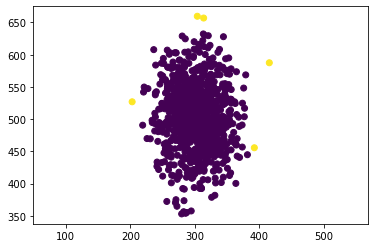

In [91]:
plt.scatter(X["heat"], X["vib"], c=p_X <= epsilon)
plt.axis("equal")